In [1]:
import pandas as pd
import plotnine as p

In [2]:
df = pd.read_csv('prime.whole.foods (1).csv')

df['dateTime'] = df['dateTime'].pipe(pd.to_datetime)
df['grandTotal'] = df['grandTotal'].str.replace(r'$', '', regex = False).astype(float)

In [3]:
df[['dateTime', 'deliveryTime', 'grandTotal', 'Received']]

,dateTime,deliveryTime,grandTotal,Received
0,2020-01-03 12:39:00,2022-11-16T20:00:00,49.55,2022-11-16T02:28:10.457550+00:00
1,2020-01-16 16:30:00,2022-11-16T20:00:00,58.26,2022-11-16T02:28:13.653597+00:00
2,2020-01-11 17:37:00,2022-11-16T20:00:00,108.92,2022-11-16T02:28:17.370664+00:00
3,2020-01-22 11:58:00,2022-11-16T20:00:00,68.66,2022-11-16T02:28:21.446060+00:00
4,2020-01-25 15:05:00,2022-11-16T18:00:00,84.96,2022-11-16T02:28:27.860007+00:00
...,...,...,...,...
101,2019-12-09 11:23:00,2022-11-16T20:00:00,45.58,2022-11-16T04:47:48.790134+00:00
102,2019-12-18 13:02:00,2022-11-16T20:00:00,46.17,2022-11-16T04:47:52.996747+00:00
103,2019-12-23 11:20:00,2022-11-16T20:00:00,77.30,2022-11-16T04:47:55.178525+00:00
104,2019-12-29 17:04:00,2022-11-16T10:00:00,67.95,2022-11-16T04:47:57.013023+00:00


C:\Users\vale\Anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


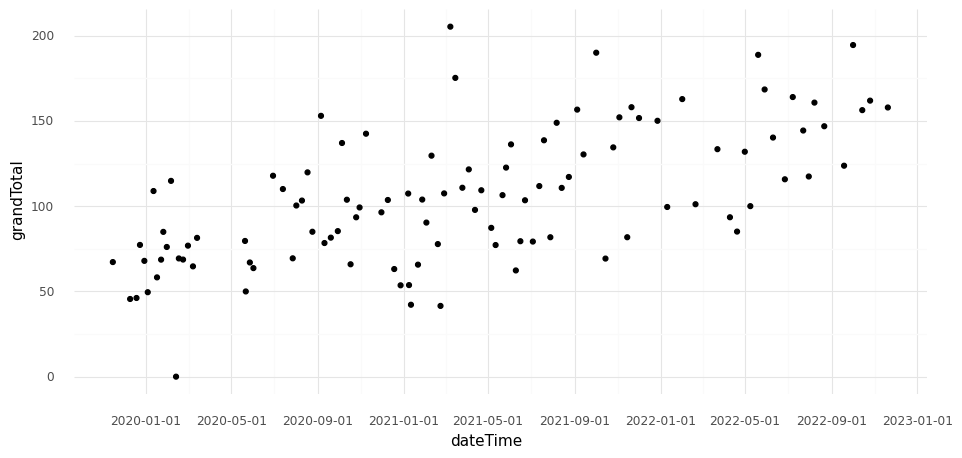

<ggplot: (-9223371898112556388)>

In [4]:
p.options.figure_size = 11, 5

(
    p.ggplot(p.aes(x = 'dateTime', y = 'grandTotal'), data = df)
    + p.geom_point()
    + p.theme_minimal()
)

In [5]:
df2 = df.set_index('dateTime').sort_index()

In [6]:
df2[['grandTotal', 'Received']]

,grandTotal,Received
dateTime,,
2019-11-14 22:11:00,67.24,2022-11-16T04:47:46.477964+00:00
2019-12-09 11:23:00,45.58,2022-11-16T04:47:48.790134+00:00
2019-12-18 13:02:00,46.17,2022-11-16T04:47:52.996747+00:00
2019-12-23 11:20:00,77.30,2022-11-16T04:47:55.178525+00:00
2019-12-29 17:04:00,67.95,2022-11-16T04:47:57.013023+00:00
...,...,...
2022-09-18 18:13:00,123.78,2022-11-16T04:24:54.410475+00:00
2022-10-01 12:47:00,194.58,2022-11-16T04:23:47.729875+00:00
2022-10-14 14:30:00,156.38,2022-11-16T04:22:31.781255+00:00


In [7]:
dfds = (
    pd.DataFrame(
        index = pd.date_range(start = df2.index[0], end = df2.index[-1], freq = 'D')
    )
    .assign(grandTotal = 0)
)
df2 = pd.concat((dfds, df2)).sort_index()
sdf = df2.rolling('91D').sum().reset_index()

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


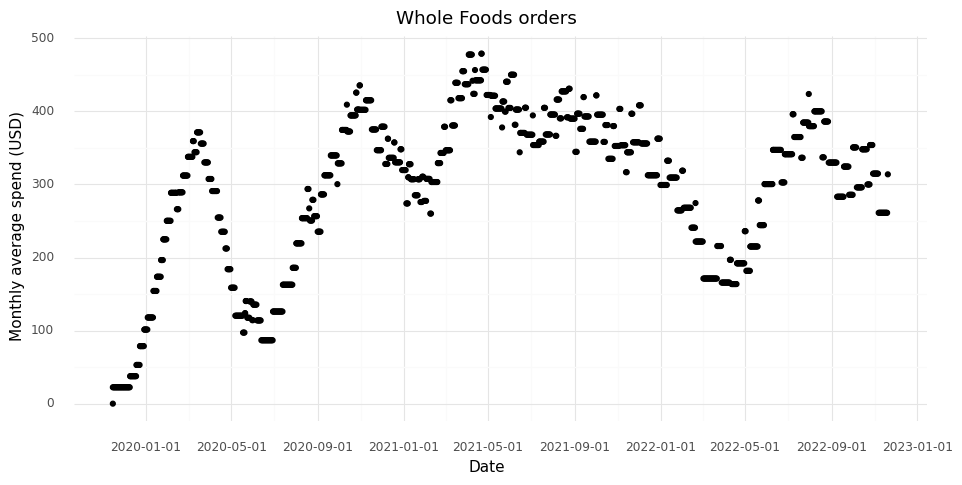

<ggplot: (-9223371898112174528)>

In [8]:
p.options.figure_size = 11, 5

p_ = (
    p.ggplot(p.aes(x = 'index', y = 'grandTotal / 3'), data = sdf)
    + p.geom_point()
    + p.theme_minimal()
    + p.labs(x = 'Date', y = 'Monthly average spend (USD)', title = 'Whole Foods orders')
)

p_

In [9]:
p_.save('1.png')

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 11 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: 1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\vale\Anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
